# Построение сетей

In [41]:
import glob
import numpy as np
import paths

def average_network(folders_in, files_out):
    """
    Создание усредненной сети.
    
    :param folders_in: Папки, где хранятся сети.
    :param files_out: Файлы усредненных сетей.
    :return: 
    """
    states_0 = ['0bk', 'win', 'l', 'story', 'rnd', 'relation', 'neut']
    states_1 = ['2bk', 'loss', 'r', 'math', 'mental', 'match', 'fear']
    
    files = sorted(glob.glob(f'{folders_in[0]}/*') + glob.glob(f'{folders_in[1]}/*') +
                   glob.glob(f'{folders_in[2]}/*') + glob.glob(f'{folders_in[3]}/*'))
    files_0 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_0)]
    files_1 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_1)]

    A_0 = np.mean([np.load(file) for file in files_0], axis=0)
    A_1 = np.mean([np.load(file) for file in files_1], axis=0)

    np.save(files_out[0], A_0)
    np.save(files_out[1], A_1)

In [3]:
average_network(paths.folders_mean_ensemble_edges_test_wm, paths.average_network_wm)
average_network(paths.folders_pca_ensemble_edges_test_gambling, paths.average_network_gambling)
average_network(paths.folders_pca_ensemble_edges_test_motor, paths.average_network_motor)
average_network(paths.folders_pca_ensemble_edges_test_language, paths.average_network_language)
average_network(paths.folders_pca_ensemble_edges_test_social, paths.average_network_social)
average_network(paths.folders_pca_ensemble_edges_test_relational, paths.average_network_relational)
average_network(paths.folders_pca_ensemble_edges_test_emotion, paths.average_network_emotion)

In [8]:
# Проверим средний вес ребер сетей
print(np.mean(np.load(paths.average_network_wm[0])), np.mean(np.load(paths.average_network_wm[1])))
print(np.mean(np.load(paths.average_network_gambling[0])), np.mean(np.load(paths.average_network_gambling[1])))
print(np.mean(np.load(paths.average_network_motor[0])), np.mean(np.load(paths.average_network_motor[1])))
print(np.mean(np.load(paths.average_network_language[0])), np.mean(np.load(paths.average_network_language[1])))
print(np.mean(np.load(paths.average_network_social[0])), np.mean(np.load(paths.average_network_social[1])))
print(np.mean(np.load(paths.average_network_relational[0])), np.mean(np.load(paths.average_network_relational[1])))
print(np.mean(np.load(paths.average_network_emotion[0])), np.mean(np.load(paths.average_network_emotion[1])))

-0.22190429865818145 0.2219857863191833
-0.10027654142658776 0.09921072798640121
-0.26396086720782747 0.2633400991088735
-0.4430803067763874 0.4440456337671121
-0.20582439728027807 0.20582292912049088
-0.22488466799740423 0.2239682677137376
-0.07763506409183514 0.07836254356031457


# Исследование глобальных характеристик сетей

Исследуем распределение весов ребер.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import paths

def weight_distribution(file0, file1, quantiles, bins=75):
    """
    Изображение распределений весов ребер двух ансамблевых графов.
    
    :param file0: Файл графа первого состояния.
    :param file1: Файл графа второго состояния.
    :param quantiles: Квантили, которые нужно изобразить. 
    :param bins: Число столбцов в гистограмме.
    :return: 
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    matrices = [np.load(file0), np.load(file1)]
    titles = [file0.split('/')[-1][:-4], file1.split('/')[-1][:-4]]
    
    for ax, mat, title, qs in zip(axes, matrices, titles, [1 - np.array(quantiles), np.array(quantiles)]):
        # Заменяем диагональные элементы на NaN
        np.fill_diagonal(mat, np.nan)
        # Получаем веса в виде одномерного массива и отфильтровываем NaN
        weights = mat.flatten()
        weights = weights[~np.isnan(weights)]
        
        # Вычисляем заданный квантиль
        q_values = np.quantile(weights, qs)
        
        # Строим гистограмму распределения весов
        ax.hist(weights, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
        for q, q_value in zip(qs, q_values):
            ax.axvline(q_value, color='red', linestyle='dashed', linewidth=1.5,
                       label=f'Quantile {q:.2f}: {q_value:.3f}')

        ax.set_xlabel('Weight')
        ax.set_ylabel('Frequency')
        ax.set_title(title)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

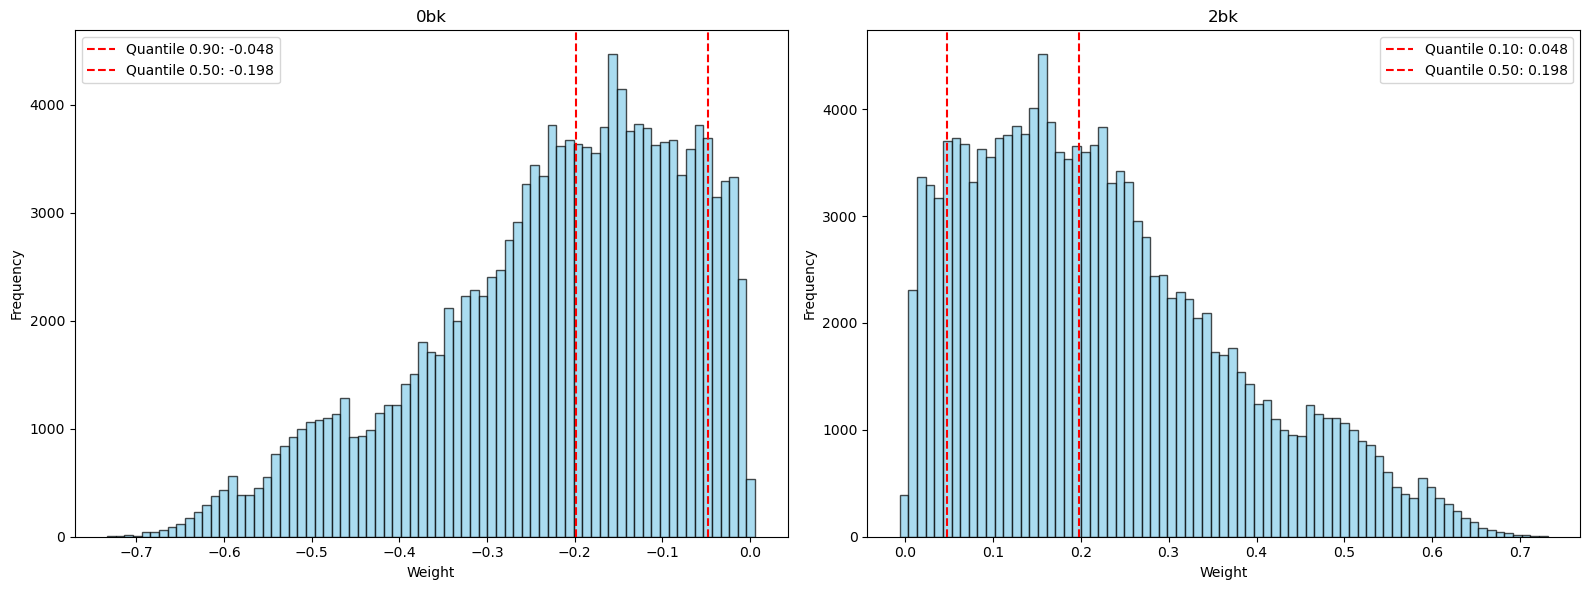

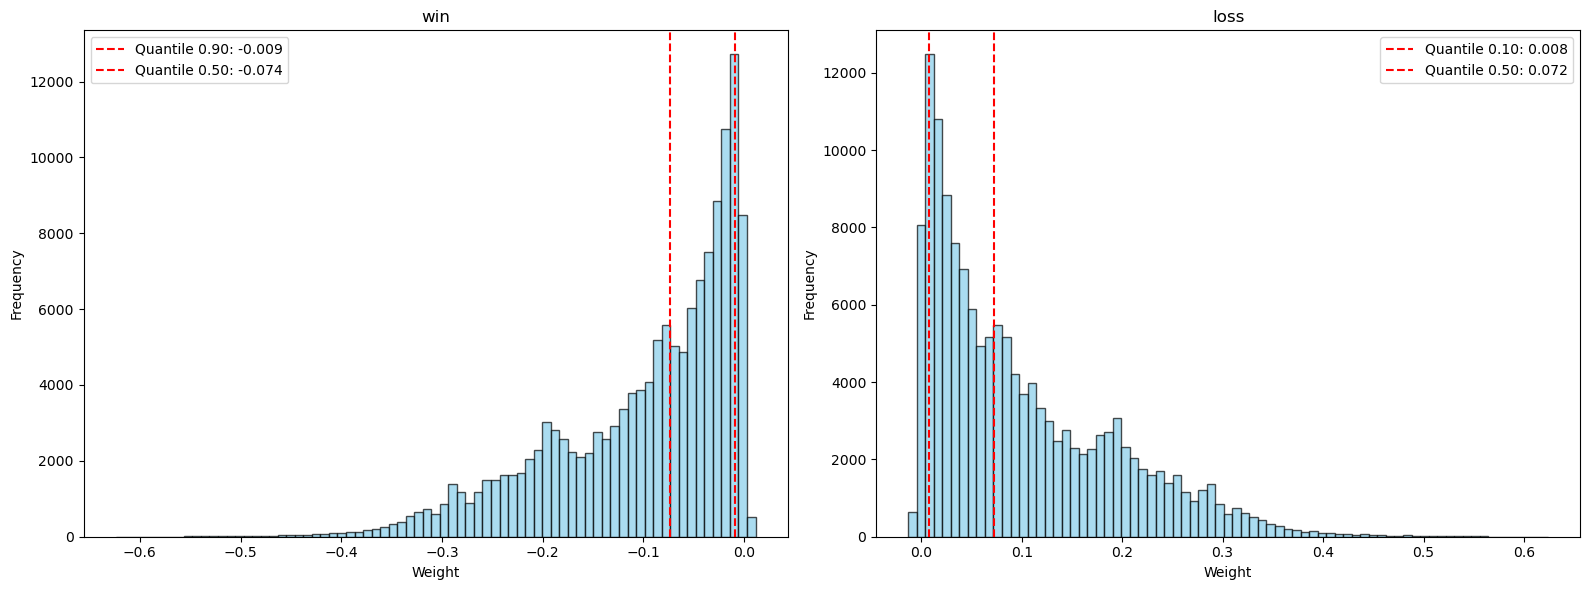

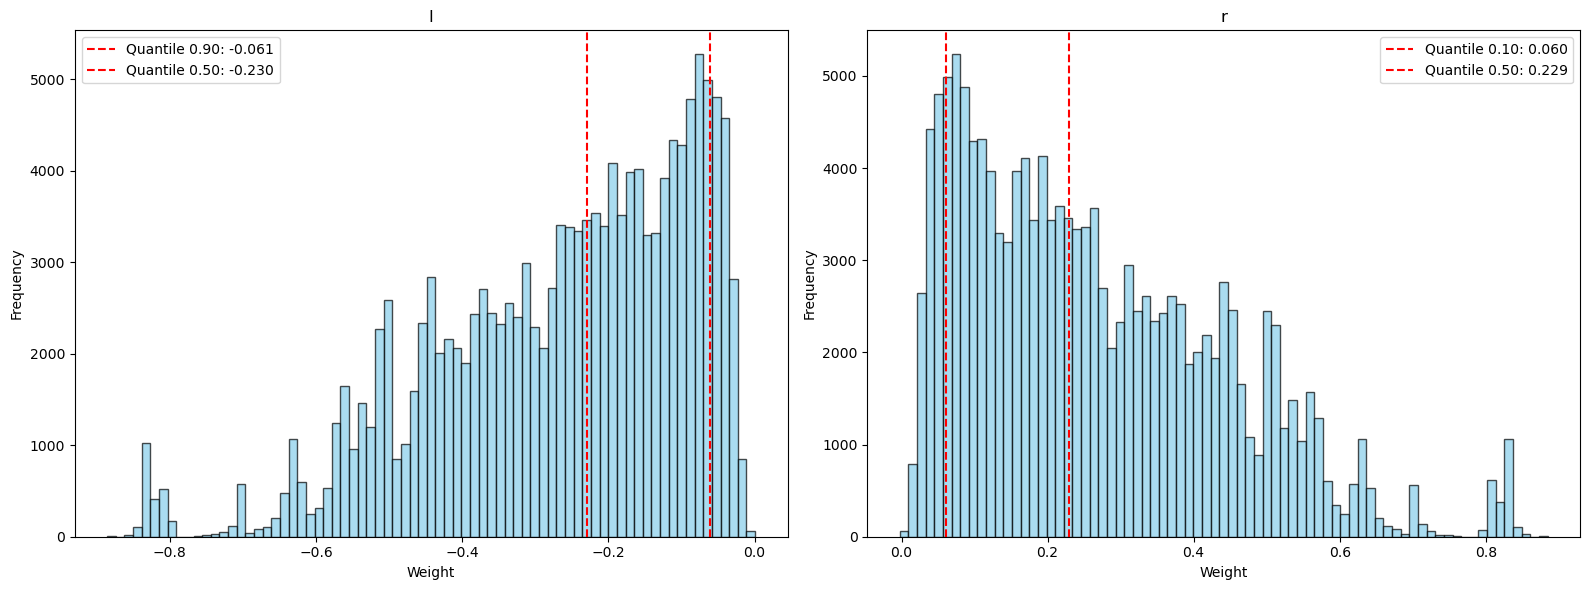

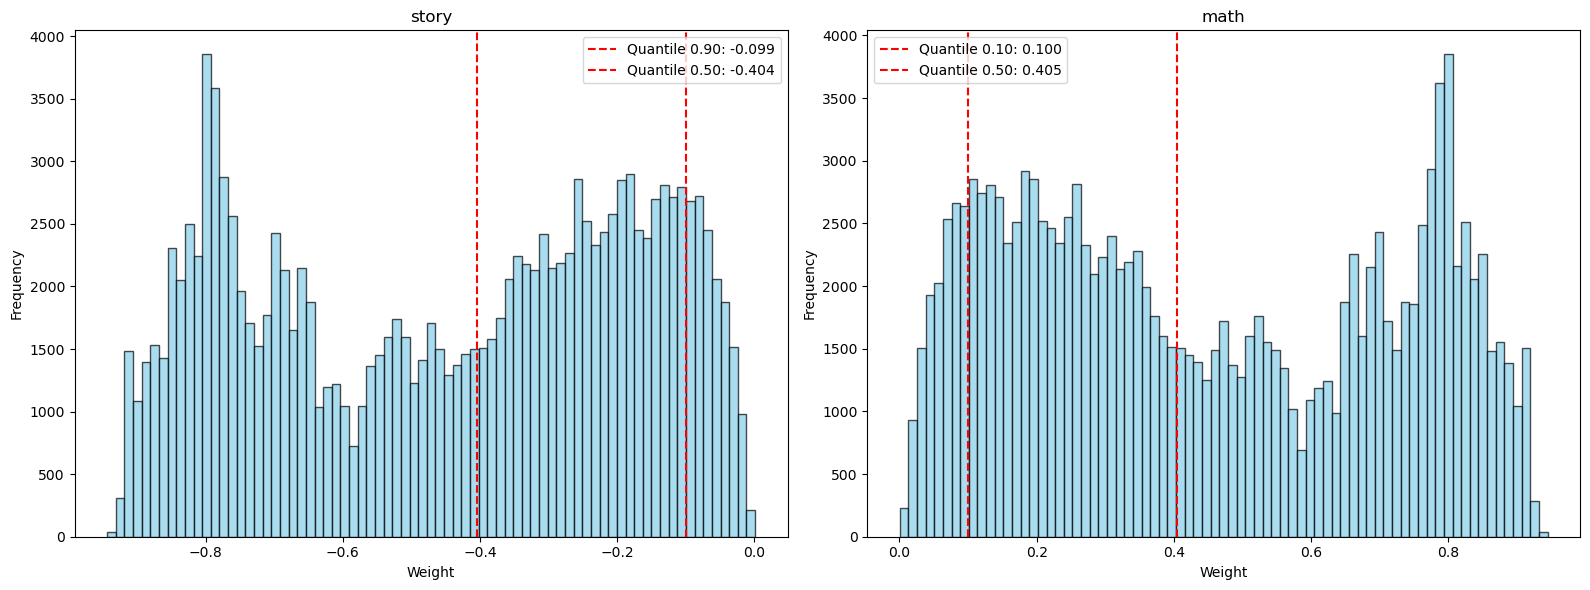

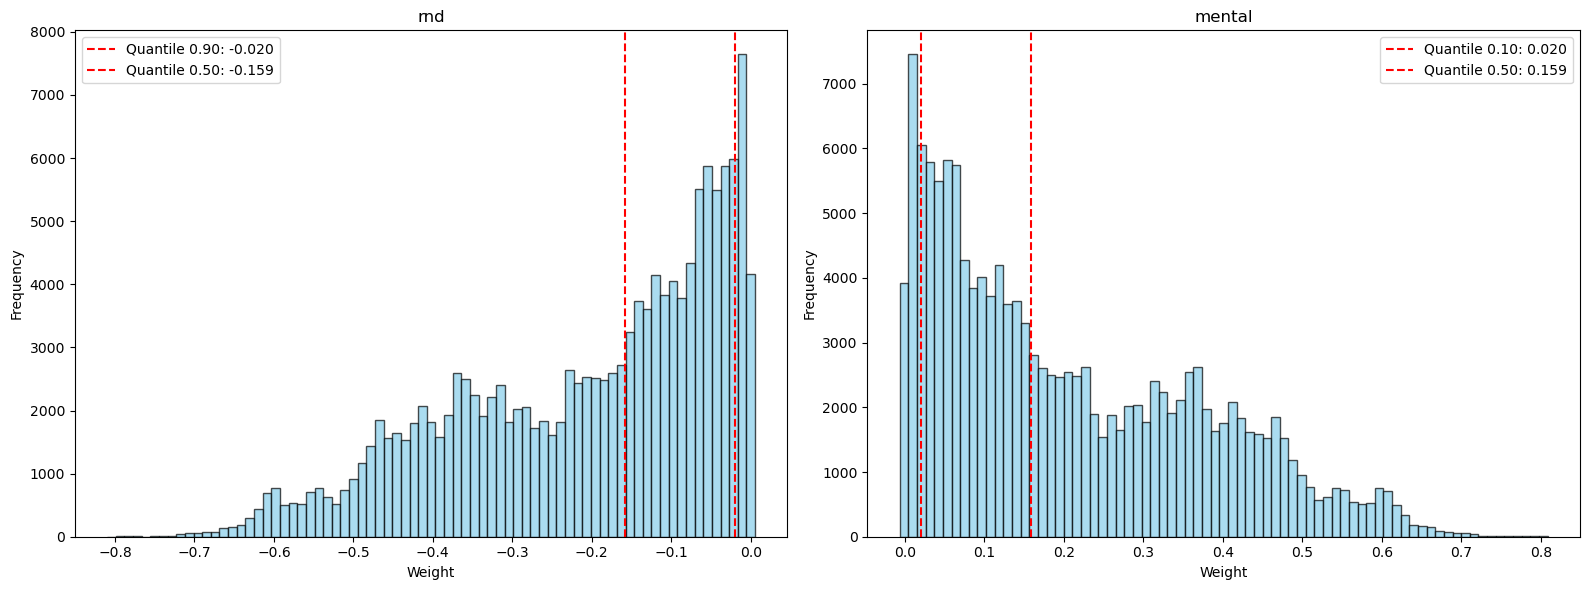

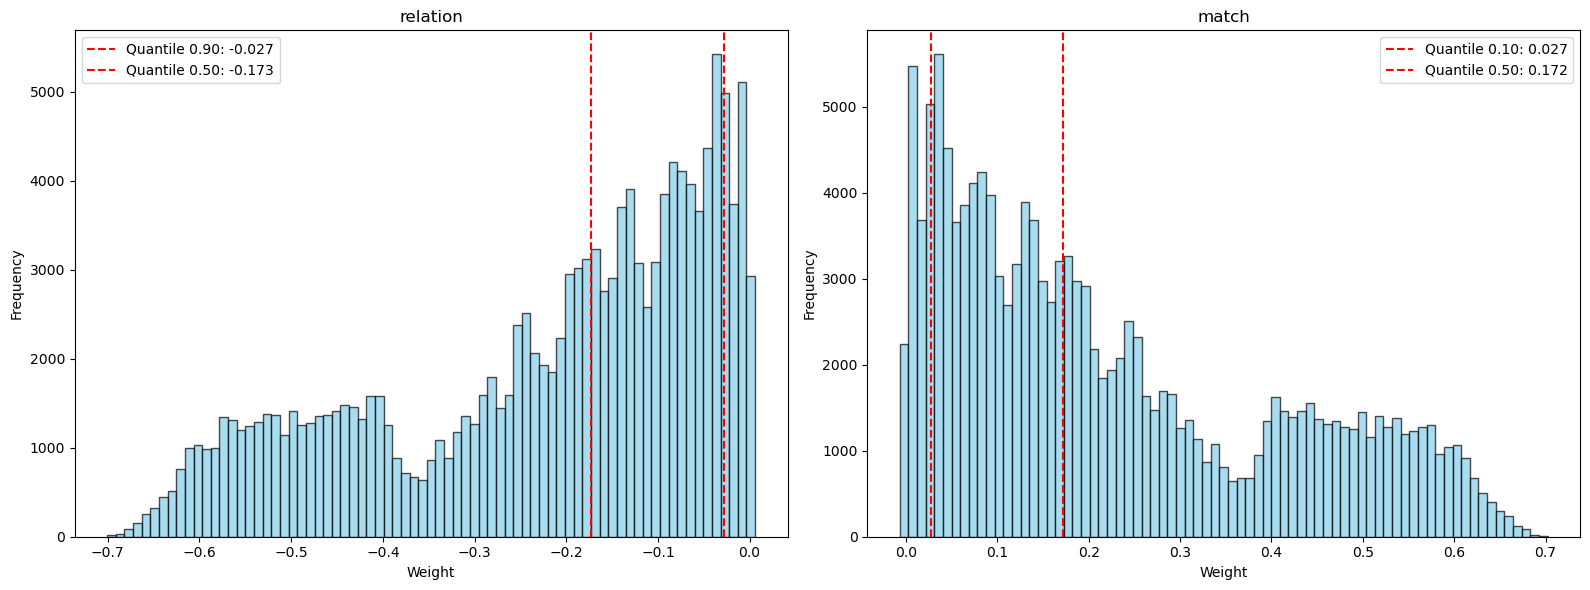

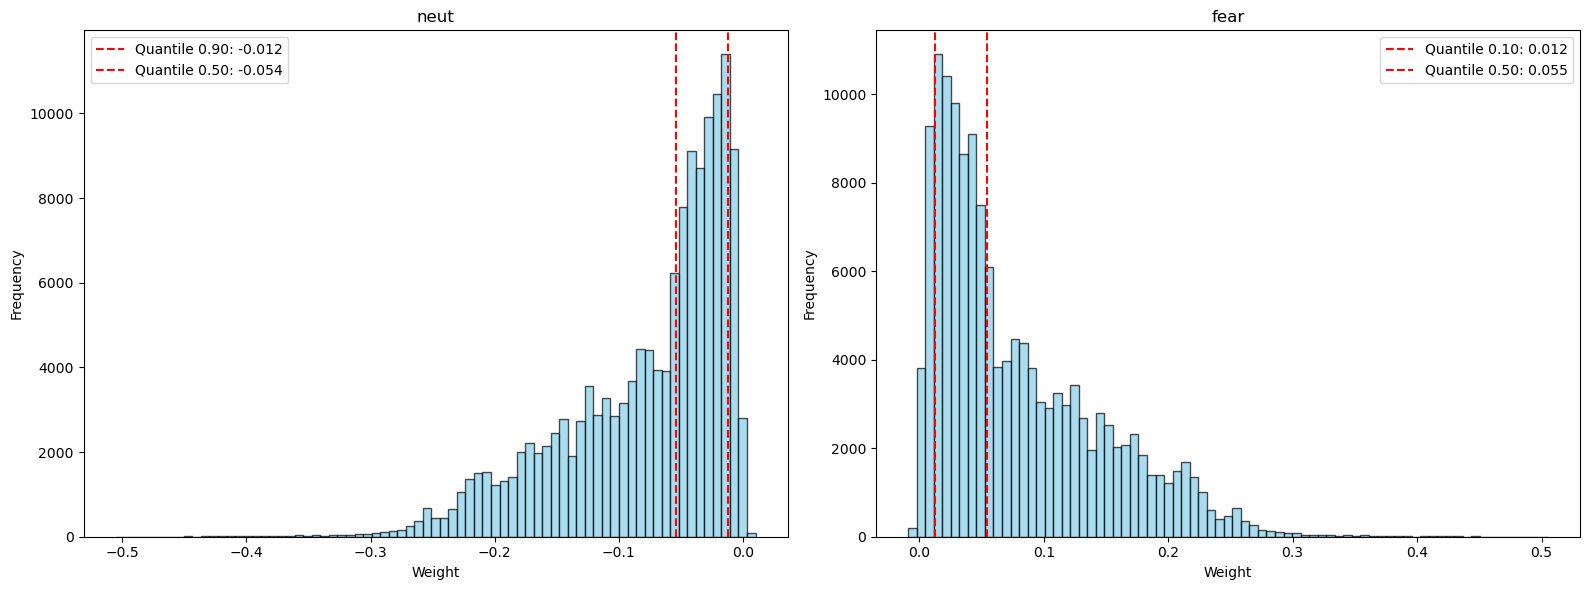

In [39]:
quantiles = [0.1, 0.5]
weight_distribution(paths.average_network_wm[0], paths.average_network_wm[1], quantiles)
weight_distribution(paths.average_network_gambling[0], paths.average_network_gambling[1], quantiles)
weight_distribution(paths.average_network_motor[0], paths.average_network_motor[1], quantiles)
weight_distribution(paths.average_network_language[0], paths.average_network_language[1], quantiles)
weight_distribution(paths.average_network_social[0], paths.average_network_social[1], quantiles)
weight_distribution(paths.average_network_relational[0], paths.average_network_relational[1], quantiles)
weight_distribution(paths.average_network_emotion[0], paths.average_network_emotion[1], quantiles)

Я решил пока продолжить исследование графов без фильтрации.

In [43]:
import networkx as nx

G_wm0, G_wm1 = (nx.from_numpy_array(np.load(paths.average_network_wm[0])), 
                nx.from_numpy_array(np.load(paths.average_network_wm[1])))
G_gambling0, G_gambling1 = (nx.from_numpy_array(np.load(paths.average_network_gambling[0])), 
                            nx.from_numpy_array(np.load(paths.average_network_gambling[1])))
G_motor0, G_motor1 = (nx.from_numpy_array(np.load(paths.average_network_motor[0])), 
                      nx.from_numpy_array(np.load(paths.average_network_motor[1])))
G_language0, G_language1 = (nx.from_numpy_array(np.load(paths.average_network_language[0])), 
                            nx.from_numpy_array(np.load(paths.average_network_language[1])))
G_social0, G_social1 = (nx.from_numpy_array(np.load(paths.average_network_social[0])), 
                        nx.from_numpy_array(np.load(paths.average_network_social[1])))
G_relational0, G_relational1 = (nx.from_numpy_array(np.load(paths.average_network_relational[0])), 
                                nx.from_numpy_array(np.load(paths.average_network_relational[1])))
G_emotion0, G_emotion1 = (nx.from_numpy_array(np.load(paths.average_network_emotion[0])), 
                          nx.from_numpy_array(np.load(paths.average_network_emotion[1])))

In [52]:
G_wm0.edges(data='weight')

EdgeDataView([(0, 1, -0.22140951215389335), (0, 2, -0.2671653345426632), (0, 3, -0.26104607980510364), (0, 4, -0.3239220822553312), (0, 5, -0.3857076845216466), (0, 6, -0.38869347688480205), (0, 7, -0.41907412826328266), (0, 8, -0.35989715533702443), (0, 9, -0.36814970113064255), (0, 10, -0.3676218231049826), (0, 11, -0.33245062867886616), (0, 12, -0.2949529648743407), (0, 13, -0.2516532431916644), (0, 14, -0.20764269792296866), (0, 15, -0.2390588152078469), (0, 16, -0.24094800280620962), (0, 17, -0.34881789413654135), (0, 18, -0.38975163792771983), (0, 19, -0.2812832249917447), (0, 20, -0.3194039976989553), (0, 21, -0.40620606220077043), (0, 22, -0.24388548453073658), (0, 23, -0.38791197681331957), (0, 24, -0.2268740748737765), (0, 25, -0.3031770506830141), (0, 26, -0.21451903515599716), (0, 27, -0.22068364973032048), (0, 28, -0.5715880782578986), (0, 29, -0.24891071846001792), (0, 30, -0.5472685828250352), (0, 31, -0.310568555275229), (0, 32, -0.4506590743712826), (0, 33, -0.34073500

С учетом того, что эксцентричность узла в полном взвешенном графе - всего лишь это вес ребра с максимальным или минимальным значением в зависимости от интерпретации веса (степень дальности или близости), то радиус и диаметр в полном взвешенном графе с весами не имеет смысла исследовать.

При этом некоторые метрики нельзя посчитать, если веса ребер отрицательны, например средний кратчайший путь. Нужно ли мне модифицировать сети и сдвигать веса в район от 0 до 1? 

In [58]:
print('Average shortest path length: ', nx.average_clustering(G_wm0, weight='weight'))

Average shortest path length:  -34.27915934155987


In [55]:
import networkx as nx

# Предположим, что G – взвешенный граф, где веса ребер хранятся в атрибуте 'weight'
# Вычисляем все кратчайшие пути с учётом весов с помощью алгоритма Дейкстры
sp = dict(nx.all_pairs_dijkstra_path_length(G_wm1, weight='weight'))

# Вычисляем эксцентричность узлов, используя вычисленные кратчайшие пути
ecc = nx.eccentricity(G_wm1, sp=sp)

# Радиус – это минимальное значение эксцентричности
radius = min(ecc.values())

# Диаметр – максимальное значение эксцентричности
diameter = max(ecc.values())

# Для среднего кратчайшего пути можно воспользоваться встроенной функцией,
# передав параметр weight='weight'
avg_shortest_path = nx.average_shortest_path_length(G_wm1, weight='weight')

print('Radius:', radius)
print('Diameter:', diameter)
print('Average shortest path length:', avg_shortest_path)


ValueError: ('Contradictory paths found:', 'negative weights?')